In [ ]:
**EDA and Business Insights**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [22]:
print("Customers Data Overview:")
print(customers.info())
print(customers.describe())
print(customers.head())

Customers Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathl

In [23]:
print("\nProducts Data Overview:")
print(products.info())
print(products.describe())
print(products.head())


Products Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [24]:
print("\nTransactions Data Overview:")
print(transactions.info())
print(transactions.describe())
print(transactions.head())


Transactions Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000 

In [36]:
data = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")
print(data.columns)
if "price_x" in data.columns:
    data.rename(columns={"price_x": "Price"}, inplace=True)
elif "price_y" in data.columns:
    data.rename(columns={"price_y": "Price"}, inplace=True)
required_columns = ["Price", "Quantity", "TotalValue"]
for col in required_columns:
    if col not in data.columns:
        print(f"Missing column: {col}")

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')
Missing column: Price


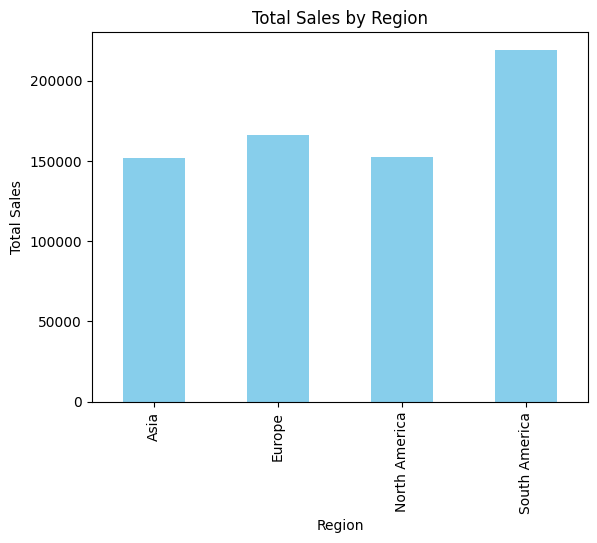

In [33]:
region_sales = data.groupby("Region")["TotalValue"].sum()
region_sales.plot(kind="bar", title="Total Sales by Region", xlabel="Region", ylabel="Total Sales", color="skyblue")
plt.show()

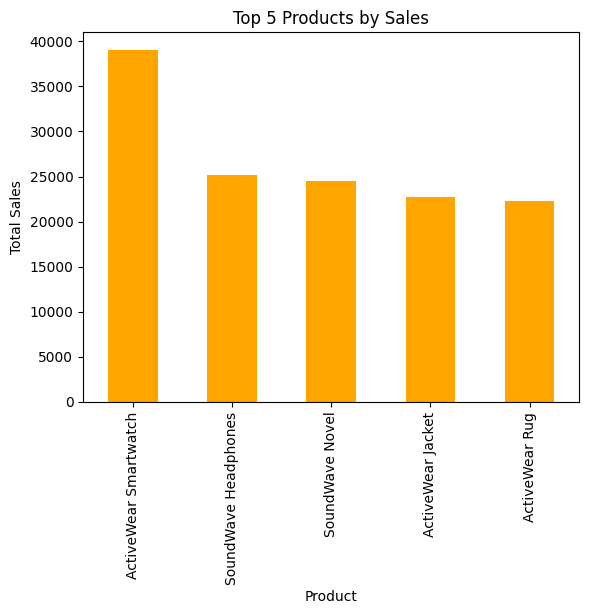

In [27]:
top_products = data.groupby("ProductName")["TotalValue"].sum().nlargest(5)
top_products.plot(kind="bar", title="Top 5 Products by Sales", xlabel="Product", ylabel="Total Sales", color="orange")
plt.show()

**Lookalike model(Task2)**

In [46]:
data = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")

In [48]:
if "price_x" in data.columns:
    data.rename(columns={"price_x": "Price"}, inplace=True)
elif "price_y" in data.columns:
    data.rename(columns={"price_y": "Price"}, inplace=True)

In [49]:
required_columns = ["Price", "Quantity", "TotalValue"]
for col in required_columns:
    if col not in data.columns:
        print(f"Missing column: {col}")
        data[col] = 0 

Missing column: Price


In [50]:
data_grouped = data.groupby("CustomerID")[["Price", "Quantity", "TotalValue"]].mean()

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_grouped)


In [52]:
lookalike_results = {}
for i, customer_id in enumerate(data_grouped.index):
    similar_indices = similarity_matrix[i].argsort()[::-1][1:4]  # Top 3 lookalikes
    similar_customers = [(data_grouped.index[j], similarity_matrix[i][j]) for j in similar_indices]
    lookalike_results[customer_id] = similar_customers

In [53]:
lookalike_df = pd.DataFrame.from_dict(lookalike_results, orient="index", columns=["Lookalike_1", "Lookalike_2", "Lookalike_3"])
lookalike_df.to_csv("Lookalike.csv")
print("Lookalike model results saved to Lookalike.csv")

Lookalike model results saved to Lookalike.csv


In [54]:
**customer segmentation(Task3)**

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [56]:
clustering_data = data.groupby("CustomerID")[["Price", "Quantity", "TotalValue"]].mean()
scaler = StandardScaler()
scaled_clustering_data = scaler.fit_transform(clustering_data)

In [57]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_clustering_data)

In [58]:
clustering_data["Cluster"] = clusters

In [59]:
db_index = davies_bouldin_score(scaled_clustering_data, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.8797720492623782


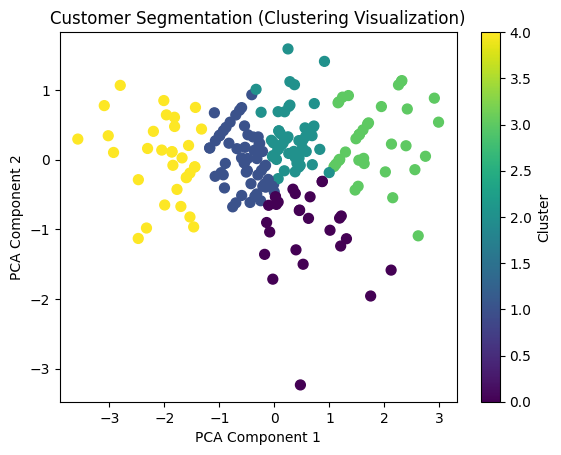

In [60]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_clustering_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap="viridis", s=50)
plt.title("Customer Segmentation (Clustering Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()